In [41]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

params = {'font.family': 'serif',}
matplotlib.rcParams.update(params)


G=6.67*10**-8  #grav in cgs
kboltz=1.38*10**-16
mu=2.5
mh=1.67*10**-24
massjup=1.89*10**30
radjup=7.140*10**9
radsun=6.96*10**10
AU=1.496*10**13.  #cm

masssat=5.683*10**29. #g
radsat=5.82*10**9. #cm
denssat=masssat/((4.*np.pi/3.)*radsat**3.)

j2n_mass=18.5346158

0.688208595941


In [2]:
import pandas as pd
transits=pd.read_csv('transits_2019B.csv',skiprows=83,delimiter=',')
planets=pd.read_csv('compositepars.csv',skiprows=123,delimiter=',')

In [3]:
### Previously Observed Planets ###
wasp52ind=planets['fpl_name'][planets['fpl_name'] == 'WASP-52 b'].index[0]
wasp4ind=planets['fpl_name'][planets['fpl_name'] == 'WASP-4 b'].index[0]
hats8ind=planets['fpl_name'][planets['fpl_name'] == 'HATS-8 b'].index[0]
hatp26ind=planets['fpl_name'][planets['fpl_name'] == 'HAT-P-26 b'].index[0]
wasp18ind=planets['fpl_name'][planets['fpl_name'] == 'WASP-18 b'].index[0]
wasp67ind=planets['fpl_name'][planets['fpl_name'] == 'WASP-67 b'].index[0]
hats29ind=planets['fpl_name'][planets['fpl_name'] == 'HATS-29 b'].index[0]
corot11ind=planets['fpl_name'][planets['fpl_name'] == 'CoRoT-11 b'].index[0]
hats35ind=planets['fpl_name'][planets['fpl_name'] == 'HATS-35 b'].index[0]
hats28ind=planets['fpl_name'][planets['fpl_name'] == 'HATS-28 b'].index[0]
hats3ind=planets['fpl_name'][planets['fpl_name'] == 'HATS-3 b'].index[0]
hats34ind=planets['fpl_name'][planets['fpl_name'] == 'HATS-34 b'].index[0]
wasp124ind=planets['fpl_name'][planets['fpl_name'] == 'WASP-124 b'].index[0]


prev_indexes=np.array([wasp52ind,wasp4ind,hats8ind,wasp67ind,
                        hats29ind,corot11ind,hats35ind,hats28ind,hats3ind,hats34ind,wasp124ind])
prev_indexes.sort

print prev_indexes

[3786 3770  289 3803  252   65  259  251  253  258 3707]


In [4]:
uniquenames=np.array([])
numtrans=np.array([])

names=transits['planetname']

for n in names:
    if not n in uniquenames:
        #print n
        uniquenames=np.append(uniquenames,n)
        numtrans=np.append(numtrans,0)
    if n in uniquenames:
        ind=np.where(uniquenames==n)[0]
        numtrans[ind]+=1

#save file to upload to exoplanet archive for object data
namesave=open('BPlanets.txt','w')
for n in uniquenames:
    namesave.write('{0}\n'.format(n))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


In [5]:
indexes=np.array([],dtype=int)
for n in uniquenames:
    try:
        index=[planets['fpl_name'] == n].index[0]
        #print n, index
        indexes=np.append(indexes,int(index))
    except:
        #print '--------> FAIL: ', n
        continue

#print indexes
indexes.sort()
print indexes

[  64   69   70   73   76   79   83   94  167  168  169  210  215  216
  226  235  236  237  238  239  240  241  243  246  247  251  252  253
  254  256  257  258  259  260  262  263  264  265  266  267  268  269
  270  271  272  273  277  278  280  281  283  285  286  287  289  290
  528  625  871  872  873  874  875  880  977  990 1007 1030 1048 1049
 1075 1076 1091 1121 1123 1127 1130 1134 1135 1137 1139 1142 1145 1180
 1181 3542 3578 3580 3627 3628 3664 3665 3666 3667 3668 3669 3670 3690
 3691 3694 3699 3700 3704 3705 3707 3708 3715 3718 3719 3721 3722 3724
 3725 3726 3728 3730 3732 3733 3735 3738 3739 3740 3742 3744 3746 3748
 3750 3751 3759 3762 3765 3770 3776 3778 3783 3784 3785 3786 3797 3798
 3799 3803 3805 3807 3811 3812 3813 3817 3819 3826 3827 3828 3831 3833
 3834 3835]


In [134]:
Targ_names=((planets['fpl_name'])[indexes]).values

Targ_Mass_J=((planets['fpl_bmassj'])[indexes]).values
Targ_Rads_J=((planets['fpl_radj'])[indexes]).values
Targ_Dens_gcm=(Targ_Mass_J*massjup)/((4./3.)*np.pi*(Targ_Rads_J*radjup)**3.)

Targ_SRad_S=(planets['fst_rad'][indexes]).values
Targ_STef_K=(planets['fst_teff'][indexes]).values
Targ_smax_a=(planets['fpl_smax'][indexes]).values
Targ_Smag_V=(planets['fst_optmag'][indexes]).values

Prev_Mass_J=((planets['fpl_bmassj'])[prev_indexes]).values
Prev_Rads_J=((planets['fpl_radj'])[prev_indexes]).values
Prev_Dens_gcm=(Prev_Mass_J*massjup)/((4./3.)*np.pi*(Prev_Rads_J*radjup)**3.)

Prev_SRad_S=(planets['fst_rad'][prev_indexes]).values
Prev_STef_K=(planets['fst_teff'][prev_indexes]).values
Prev_smax_a=(planets['fpl_smax'][prev_indexes]).values
Prev_Smag_V=(planets['fst_optmag'][prev_indexes]).values




In [123]:
trans=((Targ_Rads_J*radjup)/(Targ_SRad_S*radsun))**2.


#current semester targets#
trans=((Targ_Rads_J*radjup)/(Targ_SRad_S*radsun))**2.
planettemp=Targ_STef_K*(0.25**0.25)*((Targ_SRad_S*radsun)/(Targ_smax_a*AU))**(1./2.)
g=G*Targ_Mass_J*massjup/(Targ_Rads_J*radjup)**2.
scaleheight=kboltz*planettemp/(mu*mh*g)
ABSORP=3.0*(Targ_Rads_J*radjup)*scaleheight/(Targ_SRad_S*radsun)**2.

#previous semester targets#
prev_trans=((Prev_Rads_J*radjup)/(Prev_SRad_S*radsun))**2.
prev_planettemp=Prev_STef_K*(0.25**0.25)*((Prev_SRad_S*radsun)/(Prev_smax_a*AU))**(1./2.)
prev_g=G*Prev_Mass_J*massjup/(Prev_Rads_J*radjup)**2.
prev_scaleheight=kboltz*prev_planettemp/(mu*mh*prev_g)
prev_ABSORP=3.0*(Prev_Rads_J*radjup)*prev_scaleheight/(Prev_SRad_S*radsun)**2.



### OBSERVABILITY FILTER###
abs_indexes=np.where(ABSORP*10**6.>=150.)[0]        #grab only those with absorption depth>200ppm
tdp_indexes=np.where(trans*100.>0.4)[0]             #>0.5% transit depths
obs_indexes=np.array([],dtype=int)
for i in abs_indexes:
    if i in tdp_indexes:
        obs_indexes=np.append(obs_indexes,int(i))
print obs_indexes

#print Targ_Mass_J[obs_indexes]
#print Targ_Dens_gcm[obs_indexes]
#print Targ_Rads_J[obs_indexes]

[ 11  12  13  16  18  23  25  26  28  31  32  38  39  40  41  42  43  44
  46  48  50  51  54  83  86  87  89  90  91  93  94  95  98 101 103 104
 105 108 111 113 114 118 122 127 128 130 131 134 137 139 140 141 142 144
 146 148 150 152 154]


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater_equal


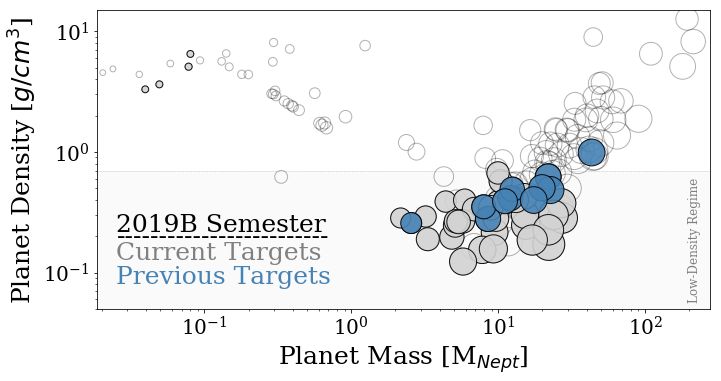

In [75]:
plt.figure(figsize=(11,5.5))

oc='steelblue'
ft='grey'

plt.fill_between([j2n_mass*10**-3,j2n_mass*1.5*10**1],0,denssat,color='lightgrey',alpha=0.1)
plt.axhline(y=denssat,color='grey',linestyle='--',linewidth=0.5,alpha=0.4)

plt.scatter(j2n_mass*Targ_Mass_J,Targ_Dens_gcm,s=500.*Targ_Rads_J,facecolor='none',edgecolor='black',alpha=0.3)
plt.scatter(j2n_mass*Targ_Mass_J[obs_indexes],Targ_Dens_gcm[obs_indexes],s=500.*Targ_Rads_J[obs_indexes],c='lightgrey',edgecolor='black',alpha=0.9)
plt.scatter(j2n_mass*Prev_Mass_J,Prev_Dens_gcm,s=500.*Prev_Rads_J,facecolor=oc,edgecolor='black',alpha=0.9)

plt.figtext(0.15,0.32,'2019B Semester',fontsize=25,color='black')
plt.figtext(0.15,0.29,'-------------------------',fontsize=25,color='black')
plt.figtext(0.15,0.25,'Current Targets',fontsize=25,color=ft)
plt.figtext(0.15,0.19,'Previous Targets',fontsize=25,color=oc)
plt.figtext(0.88,0.30,'Low-Density Regime',fontsize=12,color='grey',rotation='vertical',ha='center',va='center')


plt.xscale('log')
plt.yscale('log')
plt.ylim(0.5*10**-1,1.5*10**1)
plt.xlim(j2n_mass*10**-3,j2n_mass*1.5*10**1)
#plt.xlim(9,14)
plt.tick_params(labelsize=20)
#plt.legend(loc='lower right',fontsize=15,scatterpoints=1)
plt.xlabel('Planet Mass [M$_{{Nept}}$]',fontsize=25)
plt.ylabel('Planet Density [${g/cm^3}$]',fontsize=25)

plt.savefig('2019B_dens_vs_mass.pdf')


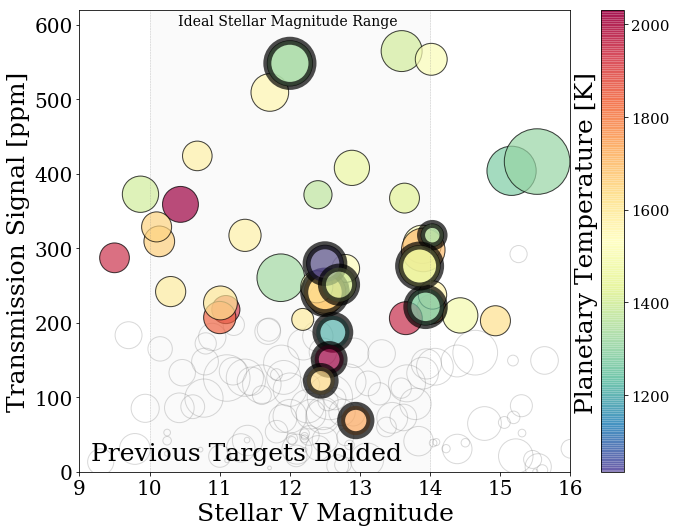

In [76]:
plt.figure(figsize=(11,8.5))


plt.fill_between([10,14],0,620,color='lightgrey',alpha=0.1)
plt.axvline(x=10,color='grey',linestyle='--',linewidth=0.5,alpha=0.4)
plt.axvline(x=14,color='grey',linestyle='--',linewidth=0.5,alpha=0.4)

plt.scatter(Targ_Smag_V,ABSORP*10**6,s=750.*100.*trans,facecolor='none',edgecolor='grey',alpha=0.3)
plt.scatter(Targ_Smag_V[obs_indexes],ABSORP[obs_indexes]*10**6,s=750.*100.*trans[obs_indexes],c=planettemp[obs_indexes],edgecolor='black',alpha=0.7,cmap=matplotlib.cm.Spectral_r)
plt.scatter(Prev_Smag_V,prev_ABSORP*10**6,s=750.*100.*prev_trans,c=prev_planettemp,facecolor='none', edgecolor='black',alpha=0.7,linewidth=8.0, cmap=matplotlib.cm.Spectral_r)


cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=15)

plt.xlim(9,16)
plt.ylim(0,620)

plt.xlabel('Stellar V Magnitude',fontsize=25)
plt.ylabel('Transmission Signal [ppm]', fontsize=25)

plt.tick_params(labelsize=20)

plt.figtext(0.765,0.5,'Planetary Temperature [K]', fontsize=25,rotation='vertical',ha='center',va='center')

plt.figtext(0.14,0.145,'Previous Targets Bolded',fontsize=25)
plt.figtext(0.25,0.855,'Ideal Stellar Magnitude Range',fontsize=14)

plt.savefig('2019B_abs_vs_mag.pdf')



In [148]:
list(transits)

ingress_jd=transits['ingressjd'].values
midpoint_jd=transits['midpointjd'].values
egress_jd=transits['egressjd'].values

ingress_am=transits['ingressairmass'].values
midpoint_am=transits['midpointairmass'].values
egress_am=transits['egressairmass'].values

rise_jd=transits['targetrisejd'].values
set_jd=transits['targetsetjd'].values

lis

In [99]:
from astropy.time import Time

jdcon=2458000.0

jul1_jd=Time('2019-07-01T00:00:00', format='isot', scale='utc').jd
print jul1_jd
aug1_jd=Time('2019-08-01T00:00:00', format='isot', scale='utc').jd
print aug1_jd
sep1_jd=Time('2019-09-01T00:00:00', format='isot', scale='utc').jd
print sep1_jd
oct1_jd=Time('2019-10-01T00:00:00', format='isot', scale='utc').jd
print oct1_jd
nov1_jd=Time('2019-11-01T00:00:00', format='isot', scale='utc').jd
print nov1_jd
dec1_jd=Time('2019-12-01T00:00:00', format='isot', scale='utc').jd
print dec1_jd
jan1_jd=Time('2020-01-01T00:00:00', format='isot', scale='utc').jd
print jan1_jd
jan15_jd=Time('2020-01-15T00:00:00', format='isot', scale='utc').jd
print jan15_jd

2458665.5
2458696.5
2458727.5
2458757.5
2458788.5
2458818.5
2458849.5
2458863.5


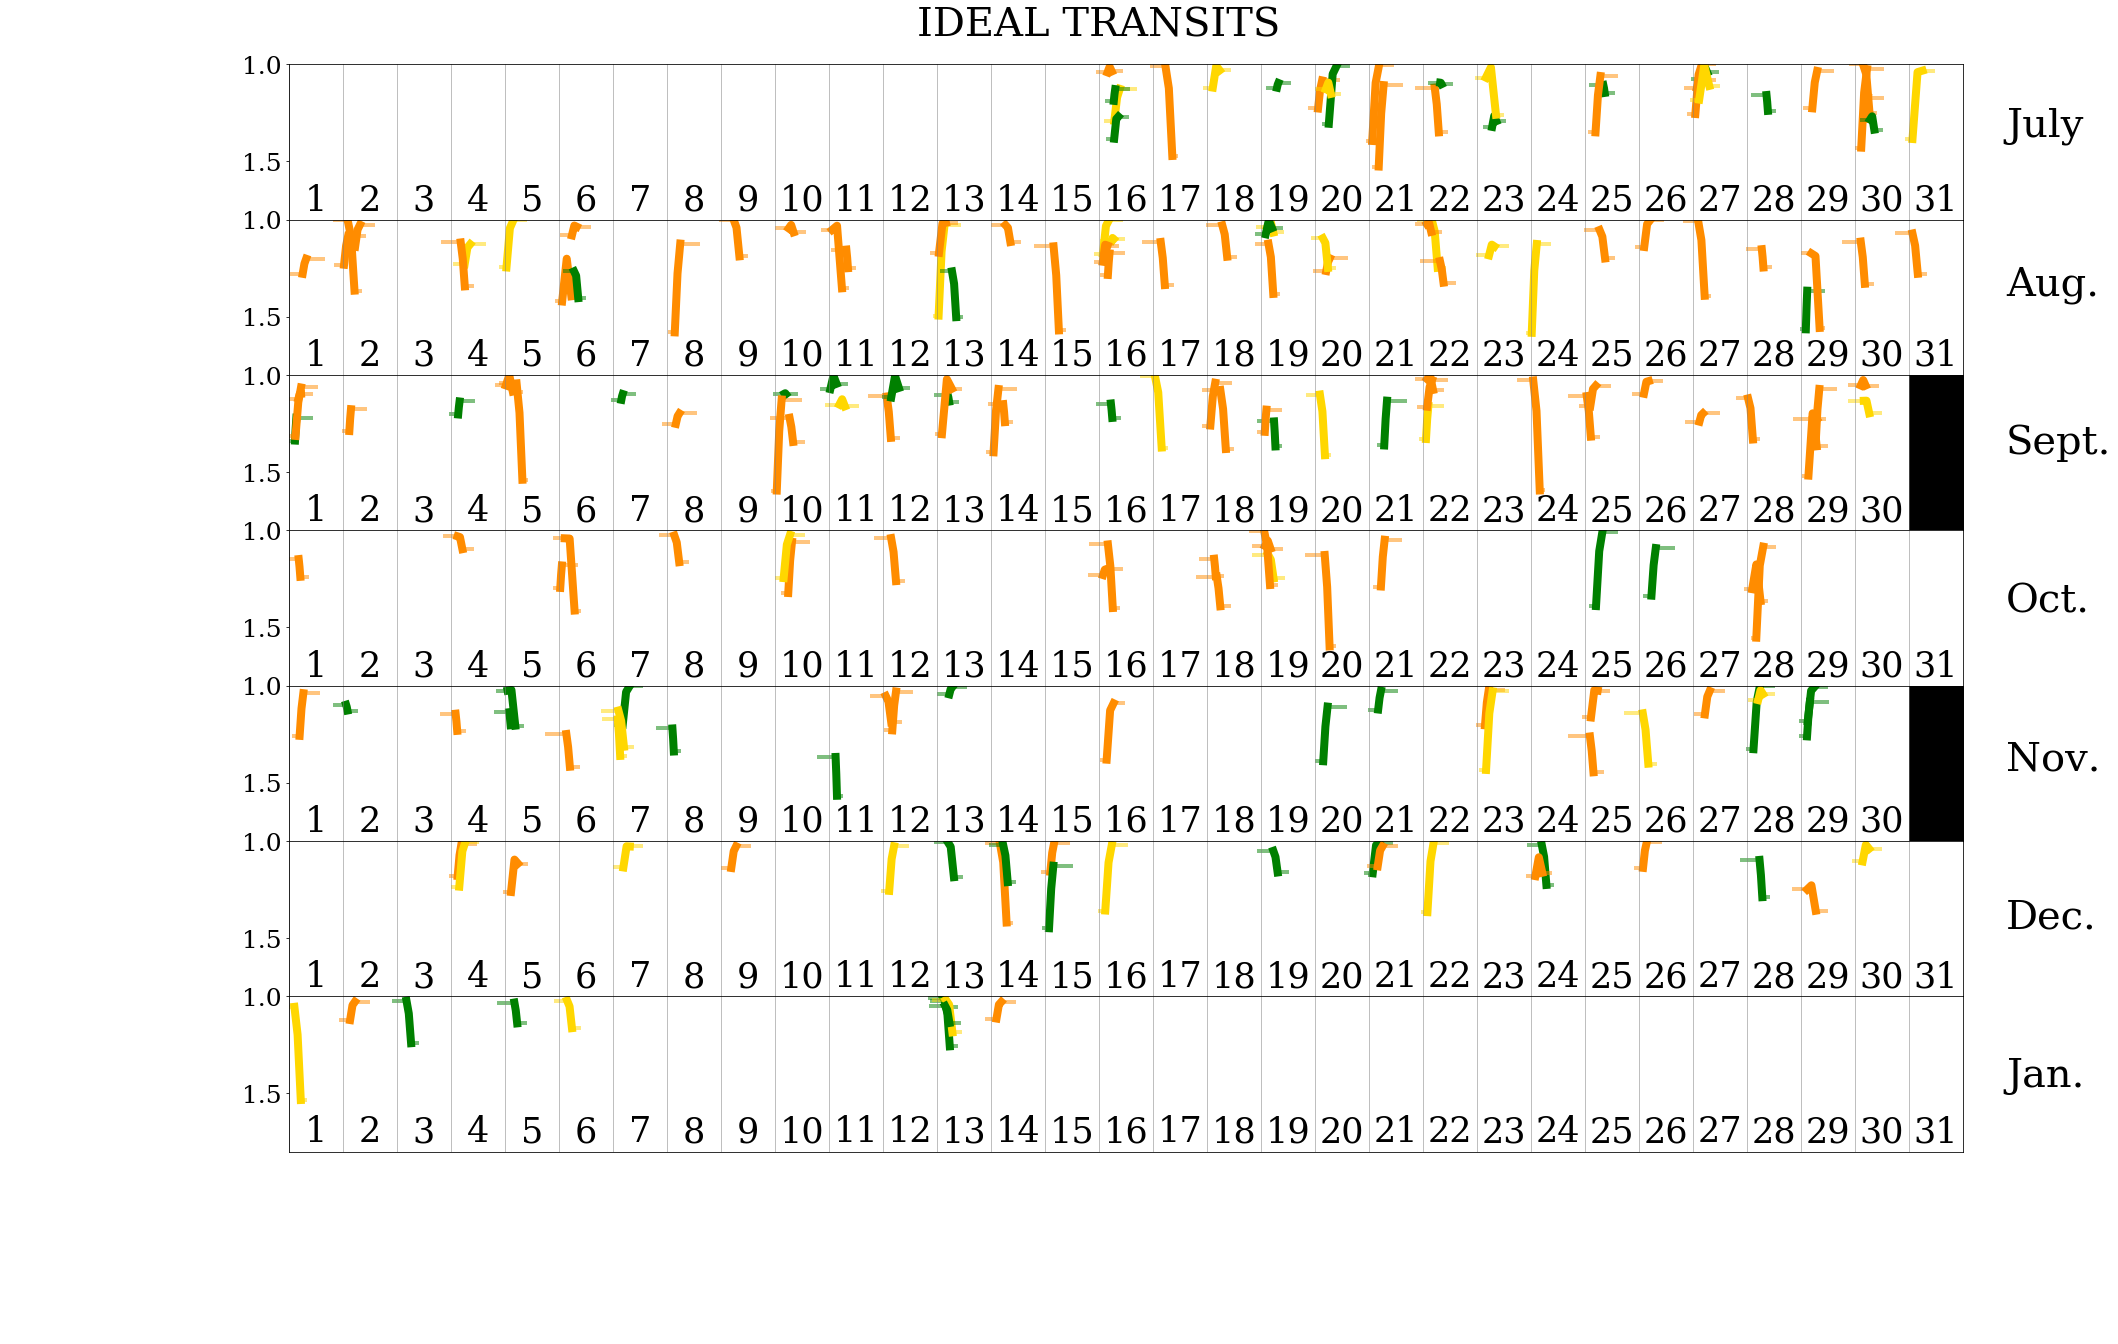

In [179]:
fig,ax=plt.subplots(7,1,figsize=(30,20),sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(0,len(ingress_jd)):
    name=(transits['planetname'])[i]
    if name in Targ_names:
        name_index=np.where(Targ_names==name)[0]
    else:
        continue
    ##check observability
    if ABSORP[name_index]*10**6.>200. and trans[name_index]*100.>0.5:
        if ABSORP[name_index]*10**6.>400:
            color='green'
        elif ABSORP[name_index]*10**6.>300:
            color='gold'
        elif ABSORP[name_index]*10**6.>200:
            color='darkorange'
        elif ABSORP[name_index]*10**6.>100:
            color='red'
        if ingress_jd[i]<aug1_jd:
            month=7
            maxday=31
            jdcon=jul1_jd
        elif ingress_jd[i]>=aug1_jd and ingress_jd[i]<sep1_jd:
            month=8
            maxday=31
            jdcon=aug1_jd
        elif ingress_jd[i]>=sep1_jd and ingress_jd[i]<oct1_jd:
            month=9
            maxday=30
            jdcon=sep1_jd
        elif ingress_jd[i]>=oct1_jd and ingress_jd[i]<nov1_jd:
            month=10
            maxday=31
            jdcon=oct1_jd
        elif ingress_jd[i]>=nov1_jd and ingress_jd[i]<dec1_jd:
            month=11
            maxday=30
            jdcon=nov1_jd
        elif ingress_jd[i]>=dec1_jd and ingress_jd[i]<jan1_jd:
            month=12
            maxday=31
            jdcon=dec1_jd
        elif ingress_jd[i]>=jan1_jd and ingress_jd[i]<jan15_jd:
            month=13
            maxday=31
            jdcon=jan1_jd
    
        ax[month-7].plot([ingress_jd[i]-jdcon,midpoint_jd[i]-jdcon,egress_jd[i]-jdcon],
                         [ingress_am[i],midpoint_am[i],egress_am[i]],linewidth=8.0,color=color,alpha=1.0)
        ax[month-7].plot([rise_jd[i]-jdcon,ingress_jd[i]-jdcon],
                         [ingress_am[i],ingress_am[i]],linewidth=4.0,color=color,alpha=0.5)
        ax[month-7].plot([egress_jd[i]-jdcon,set_jd[i]-jdcon],
                         [egress_am[i],egress_am[i]],linewidth=4.0,color=color,alpha=0.5)
    else:
        continue
        #print name, ' NOT OBSERVABLE'

for j in range(0,7):
    ax[j].set_ylim(1.8,1.0)
    ax[j].tick_params(axis='both', which='both', labelsize=25)
    for d in range(0,32):
        ax[j].axvline(x=d,color='grey',linewidth=0.5)
        ax[j].annotate(str(d),xy=(d-0.5,1.75),fontsize=35,ha='center')
        
    ax[j].set_xlim(0,31)
    
    if j==2 or j==4:
        ax[j].fill_between([30,31],1.8,1.0,color='black')
        
ax[6].set_xticks([])

plt.figtext(0.5,0.90,'IDEAL TRANSITS',fontsize=40,ha='center')
plt.figtext(0.92,0.83,'July',fontsize=40,ha='left')
plt.figtext(0.92,0.72,'Aug.',fontsize=40,ha='left')
plt.figtext(0.92,0.61,'Sept.',fontsize=40,ha='left')
plt.figtext(0.92,0.50,'Oct.',fontsize=40,ha='left')
plt.figtext(0.92,0.39,'Nov.',fontsize=40,ha='left')
plt.figtext(0.92,0.28,'Dec.',fontsize=40,ha='left')
plt.figtext(0.92,0.17,'Jan.',fontsize=40,ha='left')

plt.savefig('2019B_IDEAL_transits.pdf')

829


156


In [149]:
list(transits)

['username',
 'defaultname',
 'sourcetable',
 'planetname',
 'ra_str',
 'ra',
 'dec_str',
 'dec',
 'obsname',
 'obslat',
 'obslon',
 'reflink',
 'algorithm',
 'isdefault',
 'ismostprecise',
 'phase',
 'period',
 'transitduration',
 'transitdepthdb',
 'transitdepthcalc',
 'ttv',
 'onesigmawindowstartcalendar',
 'onesigmawindowstartjd',
 'onesigmawindowstartairmass',
 'onesigmawindowstartaltitude',
 'onesigmawindowstartazimuth',
 'ingresscalendar',
 'ingressjd',
 'ingressairmass',
 'ingressaltitude',
 'ingressazimuth',
 'midpointcalendar',
 'midpointjd',
 'propmidpointunc',
 'midpointairmass',
 'midpointaltitude',
 'midpointazimuth',
 'egresscalendar',
 'egressjd',
 'egressairmass',
 'egressaltitude',
 'egressazimuth',
 'onesigmawindowendcalendar',
 'onesigmawindowendjd',
 'onesigmawindowendairmass',
 'onesigmawindowendaltitude',
 'onesigmawindowendazimuth',
 'targetrisecalendar',
 'targetrisejd',
 'targetsetcalendar',
 'targetsetjd',
 'targetobsstartcalendar',
 'targetobsstartjd',
 'tar